In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr
import math

In [2]:
file_path = "./"
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 17

### 1. Effect of sharpening on edge detection:

In [15]:
# The following methods are implementations of the sobel edge detection algorithm

# Sobel edge detection using a predetermined threshold values
def sobel_edge(img, threshold):
    im_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    im_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    
    # Take the magnitude of both im_x and im_y to get resulting edges
    mag_img = cv2.magnitude(im_x, im_y)
    
    # Will set a value to 0 if below threshold and 1 if above the threshold
    ret, edge_img = cv2.threshold(mag_img, threshold, 255, cv2.THRESH_BINARY)
    
    return edge_img

# Sobel edge detection using a threshold ratio
def sobel_edge_max(img, thold_ratio):
    im_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    im_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    
    # Take the magnitude of both im_x and im_y to get resulting edges
    mag_img = cv2.magnitude(im_x, im_y)
    
    # We find the max value present in our sobel detector
    max_thold = np.max(mag_img)
    
    # Will set a value to 0 if below threshold and 1 if above the threshold, our threshold is set
    # as a ratio of our maximum value in our mag_img
    ret, edge_img = cv2.threshold(mag_img, max_thold*thold_ratio, 255, cv2.THRESH_TOZERO)
    
    return edge_img

In [16]:
# We load our rice image and perform sobel edge detection for threshold 150 and 200

rice_RGB = cv2.imread(file_path + "rice.png", cv2.IMREAD_COLOR)
rice_img = cv2.cvtColor(rice_RGB, cv2.COLOR_BGR2GRAY)


edge_img_150 = sobel_edge(rice_img, 150)
edge_img_200 = sobel_edge(rice_img, 200)

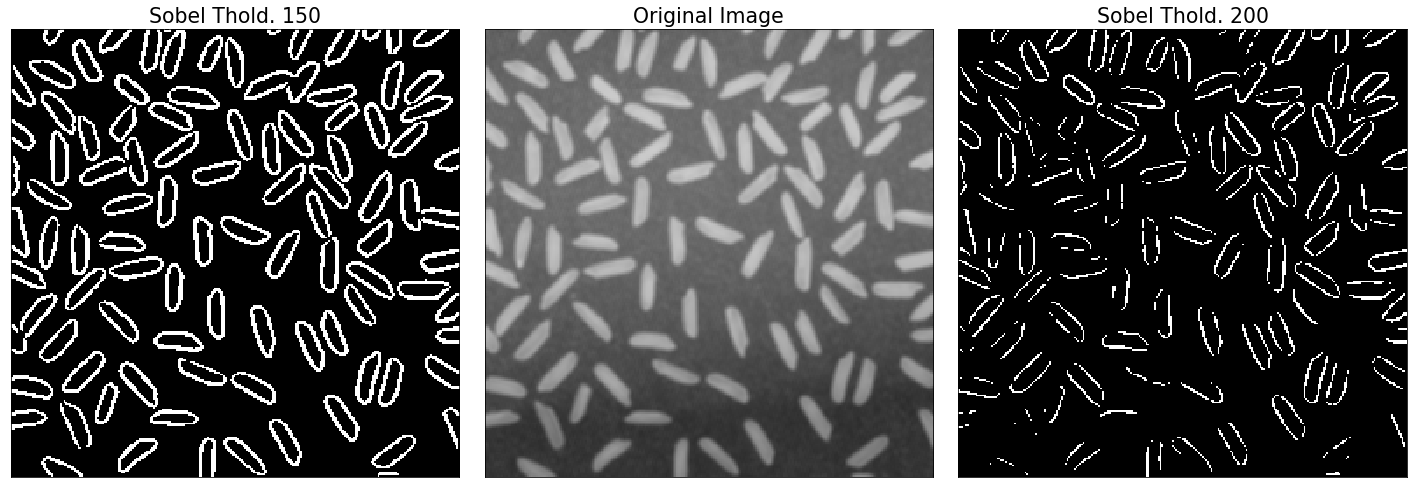

In [17]:
# Plot results of sobel edge detection

plt.subplot(131), plt.imshow(edge_img_150, cmap="gray")
plt.title("Sobel Thold. 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(edge_img_200, cmap="gray")
plt.title("Sobel Thold. 200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(rice_RGB)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [18]:
# We sharpen our image using gaussian and box filtering
rice_gaussian_blur = cv2.GaussianBlur(rice_img, (5,5), math.sqrt(2))
kernel = np.ones((5,5), np.float32)/25
rice_box_blur = cv2.filter2D(rice_img, -1, kernel)

details_gaussian = rice_img - rice_gaussian_blur
sharp_rice_gauss = rice_img + details_gaussian

details_box = rice_img - rice_box_blur
sharp_rice_box = rice_img + details_box

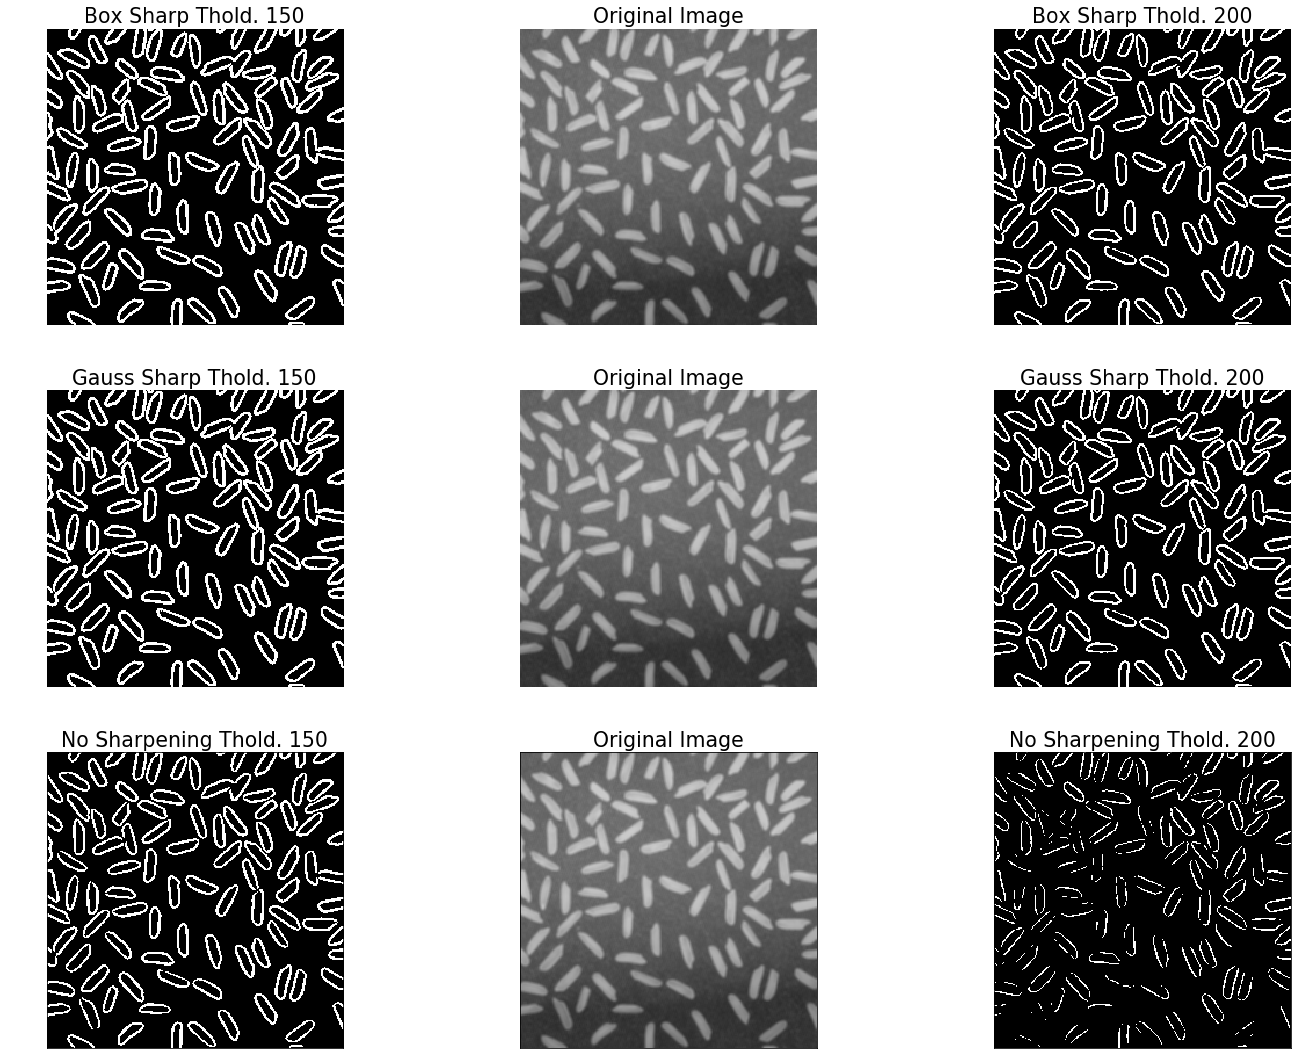

In [19]:
# We then take our sharpened images and perform edge detection 
# for thresholds 150 and 200
box_sobel_150 = sobel_edge(sharp_rice_box, 150)
box_sobel_200 = sobel_edge(sharp_rice_box, 200)
plt.subplot(431), plt.imshow(box_sobel_150, cmap="gray")
plt.title("Box Sharp Thold. 150"), plt.axis('off')
plt.subplot(433), plt.imshow(box_sobel_200, cmap="gray")
plt.title("Box Sharp Thold. 200"), plt.axis('off')
plt.subplot(432), plt.imshow(rice_RGB)
plt.title("Original Image"), plt.axis('off')

gauss_sobel_150 = sobel_edge(sharp_rice_box, 150)
gauss_sobel_200 = sobel_edge(sharp_rice_box, 200)
plt.subplot(434), plt.imshow(gauss_sobel_150, cmap="gray")
plt.title("Gauss Sharp Thold. 150"), plt.axis('off')
plt.subplot(436), plt.imshow(gauss_sobel_200, cmap="gray")
plt.title("Gauss Sharp Thold. 200"), plt.axis('off')
plt.subplot(435), plt.imshow(rice_RGB)
plt.title("Original Image"), plt.axis('off')

plt.subplot(437), plt.imshow(edge_img_150, cmap="gray")
plt.title("No Sharpening Thold. 150"), plt.xticks([]), plt.yticks([])
plt.subplot(439), plt.imshow(edge_img_200, cmap="gray")
plt.title("No Sharpening Thold. 200"), plt.xticks([]), plt.yticks([])
plt.subplot(438), plt.imshow(rice_RGB)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

#### What was the effectiveness of using sharpening?

Using sharpening, it is clear to see that the edges of the rice become much more defined after edge detection. Comparing our non-sharpened sobel detection to our sharpened edge detection it is clear to see that the edges that we detect are much thicker with sharpening than without.

It is also noted that they are higher in intensity. As we increase our threshold in the unsharpened example, we start to lose the outlines of the grains of rice, however after sharpening, the edges remain to be well defined even at a threshold as high as 200.

This indicates that sharpening the image helps increase the appearance of edges and increases their general intensity.

### 2. Effect of denoising on edge detection:

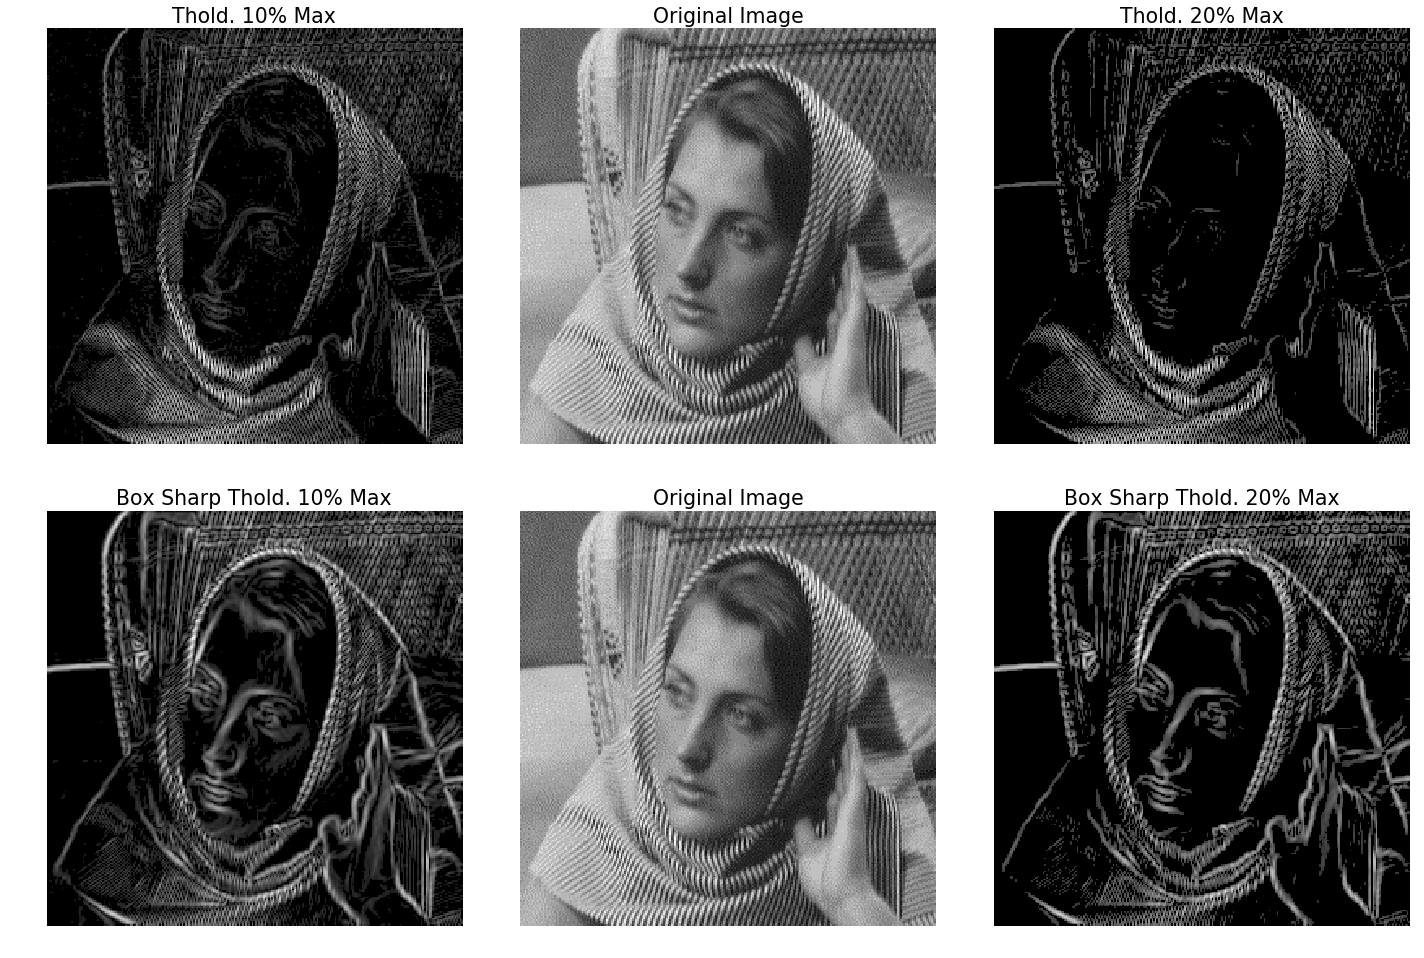

In [22]:
# We read the woman image from file and run sobel edge detection on it and plot
woman_RGB = cv2.imread(file_path + "woman.png", cv2.IMREAD_COLOR)
woman_img = cv2.cvtColor(woman_RGB, cv2.COLOR_BGR2GRAY)
woman_sobel_01 = sobel_edge_max(woman_img, 0.1)
woman_sobel_02 = sobel_edge_max(woman_img, 0.2)


plt.subplot(331), plt.imshow(woman_sobel_01, cmap="gray")
plt.title("Thold. 10% Max"), plt.axis('off')
plt.subplot(333), plt.imshow(woman_sobel_02, cmap="gray")
plt.title("Thold. 20% Max"), plt.axis('off')
plt.subplot(332), plt.imshow(woman_RGB)
plt.title("Original Image"), plt.axis('off')

# We then filter our image using a 3x3 box filter and run sobel edge detection and plot
kernel = np.ones((3,3), np.float32)/9
woman_box = cv2.filter2D(woman_img, -1, kernel)
woman_sobel_01 = sobel_edge_max(woman_box, 0.1)
woman_sobel_02 = sobel_edge_max(woman_box, 0.2)
plt.subplot(334), plt.imshow(woman_sobel_01, cmap="gray")
plt.title("Box Sharp Thold. 10% Max"), plt.axis('off')
plt.subplot(336), plt.imshow(woman_sobel_02, cmap="gray")
plt.title("Box Sharp Thold. 20% Max"), plt.axis('off')
plt.subplot(335), plt.imshow(woman_RGB)
plt.title("Original Image"), plt.axis('off')

plt.tight_layout()
plt.show()

It is effective to denoise prior to performing edge detection. This is because edge detection relies on the derivative operator. Derivatives are very susceptible to noise, and with even a little bit of noise in the image, the derivative can have very high variance and not be representative of the original signal or image.

However, it is also noted that when we reduce noise by filtering we are also at a risk of losing fine details in the image and not be able to detect some lines that are present in the image. This can be seen in the headscarf of the woman particularly in the 3rd column of images.

Therefore, it is extremely effective to denoise an image before performing edge detection but there is a potential tradeoff with accuracy.